In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from io import BytesIO
import os

# **Lecture d'une image en couleur:**
affichage et affichage des dimensions ..

In [ ]:
img = mpimg.imread('fleur2.jpg')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.show()
s = img.shape

print(s)

rouge = img[:,:,0]
vert = img[:,:,1]
bleu = img[:,:,2]


NameError: ignored

In [ ]:
image = Image.open('fleur2.jpg')
print('dimension: ',image.size)
print('mode: ',image.mode)
print('format: ',image.format)
print('talle: ',os.path.getsize('fleur2.jpg'))

dimension:  (1200, 800)
mode:  RGB
format:  JPEG
talle:  937655


In [ ]:
new = np.zeros(s,dtype='int64')

# **Sauvegarde sous format PNG**

In [ ]:
image = Image.open('fleur2.jpg')
image.save('/content/image.png')

image = Image.open('image.png')
print('dimension: ',image.size)
print('mode: ',image.mode)
print('format: ',image.format)
print('talle: ',os.path.getsize('image.png'))

dimension:  (1200, 800)
mode:  RGB
format:  PNG
talle:  1518256


# **Sauvegarde sous format TIFF**

In [ ]:
image = Image.open('fleur2.jpg')
image.save('/content/image.TIFF')

image = Image.open('image.TIFF')
print('dimension: ',image.size)
print('mode: ',image.mode)
print('format: ',image.format)
print('talle: ',os.path.getsize('image.TIFF'))

dimension:  (1200, 800)
mode:  RGB
format:  TIFF
talle:  2880140


# **Afficher l'imege en niveaux de rouge**

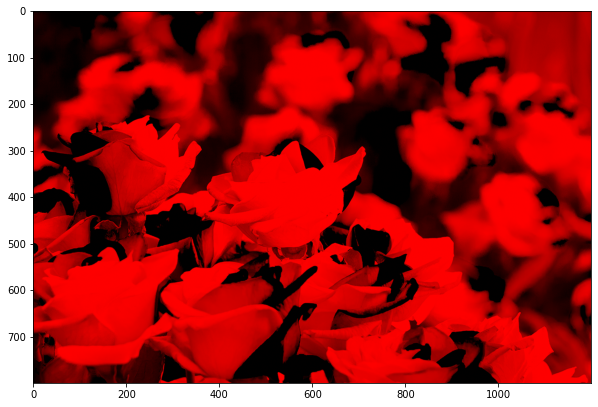

In [ ]:
rouge = np.copy(img)
rouge[:,:,(1,2)] = 0


plt.figure(figsize=(10,10))
imgplot = plt.imshow(rouge)
plt.show()     

# **Afficher l'imege en niveaux de vert**

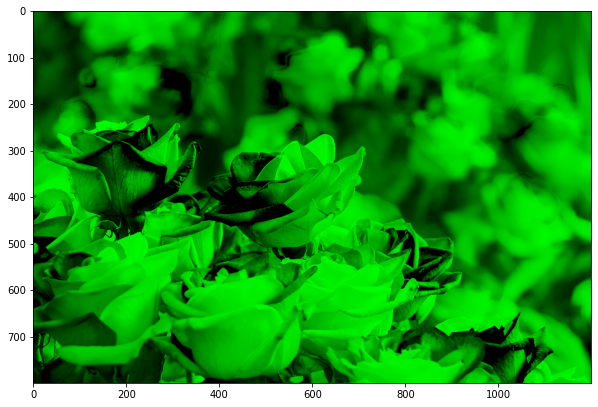

In [ ]:
vert = np.copy(img)
vert[:,:,(0,2)] = 0
plt.figure(figsize=(10,10))
imgplot = plt.imshow(vert)
plt.show()    

# **Afficher l'imege en niveaux de bleu**

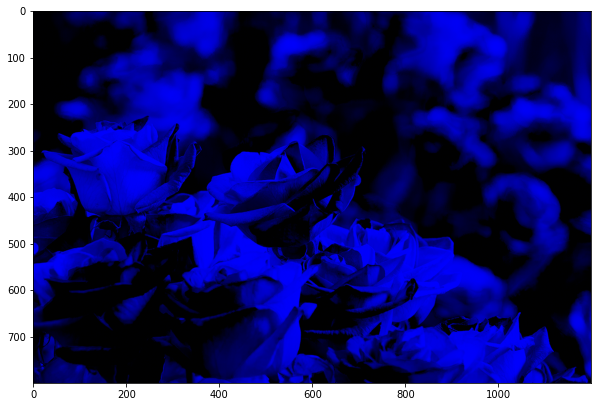

In [ ]:
bleu = np.copy(img)
bleu[:,:,(0,1)] = 0
plt.figure(figsize=(10,10))
imgplot = plt.imshow(bleu)
plt.show()   

# **Reconstitution de l'image**

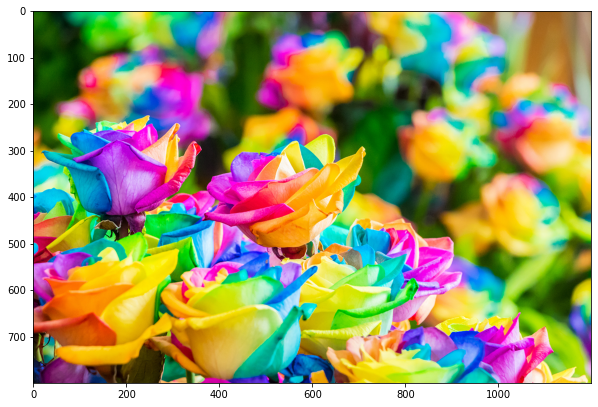

In [ ]:
plt.figure(figsize=(10,10))
imgplot = plt.imshow(rouge+vert+bleu)
plt.show()

# **L'image inversé**

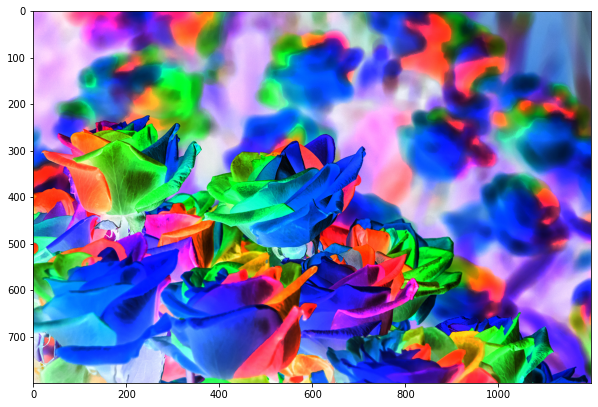

In [ ]:
inverse = np.zeros(s,dtype='int64')
inverse = 255 - img
plt.figure(figsize=(10,10))
imgplot = plt.imshow(inverse)
plt.show()        

# **Affichage en niveaux de gris**

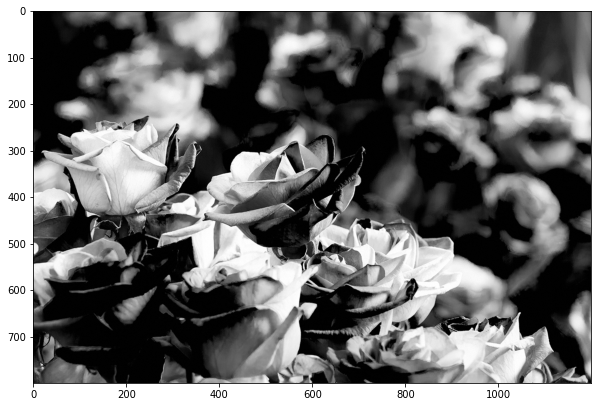

In [ ]:
img = mpimg.imread('fleur2.jpg')
s = img.shape

grouge = np.zeros(s,dtype='int64')
for i in range(s[0]):
  for j in range(s[1]):
    for k in range(s[2]):
      grouge[i,j,k] = img[i,j,0]
gvert = np.zeros(s,dtype='int64')
for i in range(s[0]):
  for j in range(s[1]):
    for k in range(s[2]):
      grouge[i,j,k] = img[i,j,1]
gbleu = np.zeros(s,dtype='int64')
for i in range(s[0]):
  for j in range(s[1]):
    for k in range(s[2]):
      grouge[i,j,k] = img[i,j,2]

gris = np.int64(0.299* grouge + 0.587*gvert + 0.114*gbleu)
#gris = np.int64(0.333* grouge + 0.333*gvert + 0.333*gbleu)

plt.figure(figsize=(10,10))
imgplot = plt.imshow(grouge)
plt.show() 

# **Affichage en binaire**

In [ ]:
bin = np.zeros(s,dtype='int64')
for i in range(s[0]):
  for j in range(s[1]):
    for k in range(s[2]):
      if (gris[i,j,k]> 30): bin[i,j,k] = 250
      else: bin[i,j,k] = 0

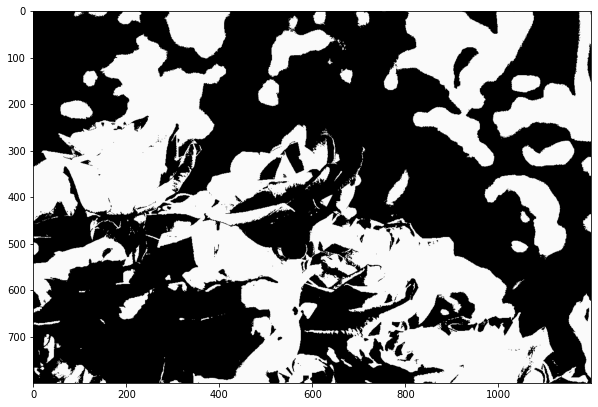

In [ ]:
plt.figure(figsize=(10,10))
imgplot = plt.imshow(bin)
plt.show() 

## **Convolution**

In [ ]:
Filtre = [[-1,-2,-1],[-2,16,-2],[-1,-2,-1]]
def Convolution2D(Filtre,img,x,y):
  p0 = p1 = p2 = 0
  for i in range(-1,1):
   for j in range(-1,1):
    p0 += Filtre[i+1][j+1]*img[y+i,x+j][0]
    p1 += Filtre[i+1][j+1]*img[y+i,x+j][1]
    p2 += Filtre[i+1][j+1]*img[y+i,x+j][2]
    # normalisation des composantes
    p0 = int(p0/9.0)
    p1 = int(p1/9.0)
    p2 = int(p2/9.0)
  # retourne le pixel convolué
  return (p0,p1,p2)

In [ ]:
for x in range(len(img)):
  for y in range(len(x)):
   p = Convolution2D(Filtre,img,x,y)
   imgF.putpixel((y,x),p)